<a href="https://colab.research.google.com/github/humanitariandataco/CORONA_STAT_WORLD_FIXED_DATASET.ipynb/blob/master/CORONA_STAT_WORLD_FIXED_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TIME SERIES ANALYSIS ON THE COVID-19 (CORONAVIRUS) CASES AND DEATHS IN THE WORLD VIA A FIXED DATASET(1 JAN 2020-UP-TO-NOW)


In [ ]:
#importing relevant libraries
import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import datetime
from datetime import datetime, timedelta
#For using Google Drive path & Saving data to Google Drive 
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
#This part is for daily update the dataset.
today = datetime.now()
today = today.strftime('%Y-%m-%d')

yesterday = datetime.now() - timedelta(days=1)
yesterday = yesterday.strftime('%Y-%m-%d')

try: 
    url=f'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{today}.xlsx'
    df = pd.read_excel(url, parse_date=[0],index_col=0)#Parsing date is for time series analysis  
    df_domain = pd.DataFrame(df)
    
except:    
    url=f'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{yesterday}.xlsx'
    df = pd.read_excel(url, parse_date=[0],index_col=0)#Parsing date is for time series analysis  
    df = pd.DataFrame(df)
        
#Data Wrangling
df.columns = ['Day','Month','Year','Cases','Deaths', 'Countries_and_territories','GeoId','Country_Code','Population','Continent']

df.drop('Day',1,inplace=True)
df.drop('Month',1,inplace=True)
df.drop('Year',1,inplace=True)
df.drop('Country_Code',1,inplace=True)
df.drop('Population',1,inplace=True)
#df = df[df['GeoId'] == 'NL']
df.drop('GeoId',1,inplace=True)
df.drop(df.tail(1).index,inplace=True) # drop last row 31-12-2019
#df.set_index(pd.DatetimeIndex(df['dateRep']), inplace=True)
#df.loc[:, 'Case_Fatality_Ratio'] =df['Deaths']/df.Cases
#df_NL=df

#Seave it to a csv file to a certain path
#df.to_csv (r'C:/Users/lenovo/NLP_Homework/ECDC_data_world.csv',  index = True, header=True)
df.to_csv (r'/content/drive/My Drive/NLP proje/Our codings/Corona_Time_Series_World/ECDC_data_world.csv',  index = True, header=True)

df.head(10)

,Cases,Deaths,Countries_and_territories,Continent
dateRep,,,,
2020-05-20,581,5,Afghanistan,Asia
2020-05-19,408,4,Afghanistan,Asia
2020-05-18,262,1,Afghanistan,Asia
2020-05-17,0,0,Afghanistan,Asia
2020-05-16,1063,32,Afghanistan,Asia
2020-05-15,113,6,Afghanistan,Asia
2020-05-14,259,3,Afghanistan,Asia
2020-05-13,280,5,Afghanistan,Asia
2020-05-12,285,2,Afghanistan,Asia


In [ ]:
df.tail(10)

,Cases,Deaths,Countries_and_territories,Continent
dateRep,,,,
2020-03-31,0,0,Zimbabwe,Africa
2020-03-30,0,0,Zimbabwe,Africa
2020-03-29,2,0,Zimbabwe,Africa
2020-03-28,2,0,Zimbabwe,Africa
2020-03-27,0,0,Zimbabwe,Africa
2020-03-26,1,0,Zimbabwe,Africa
2020-03-25,0,0,Zimbabwe,Africa
2020-03-24,0,1,Zimbabwe,Africa
2020-03-23,0,0,Zimbabwe,Africa


In [ ]:
print(df.isnull().sum().sort_values(ascending=False)) #Let's find out the number of missing values in df and sort them down in descending order.

Continent                    0
Countries_and_territories    0
Deaths                       0
Cases                        0
dtype: int64


In [ ]:
type(df.index[0]) #Checking the dates whether they are timestamp or not. 
print(df.index[0])

2020-05-20 00:00:00


In [ ]:
df.info() #general overview on dataset

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18032 entries, 2020-05-20 to 2020-03-22
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Cases                      18032 non-null  int64 
 1   Deaths                     18032 non-null  int64 
 2   Countries_and_territories  18032 non-null  object
 3   Continent                  18032 non-null  object
dtypes: int64(2), object(2)
memory usage: 704.4+ KB


In [ ]:
df.describe() #general descriptive statistics overview on dataset

,Cases,Deaths
count,18032.000000,18032.000000
mean,267.862855,17.808008
std,1693.536441,125.125027
min,-2461.000000,-217.000000
25%,0.000000,0.000000
50%,2.000000,0.000000
75%,40.000000,1.000000
max,48529.000000,4928.000000


In [ ]:
df_World=df[today] #A snapshot for current date of  the world
df_World

,Cases,Deaths,Countries_and_territories,Continent
dateRep,,,,
2020-05-20,581,5,Afghanistan,Asia
2020-05-20,1,0,Albania,Europe
2020-05-20,176,6,Algeria,Africa
2020-05-20,0,0,Andorra,Europe
2020-05-20,2,0,Angola,Africa
...,...,...,...,...
2020-05-20,0,0,Vietnam,Asia
2020-05-20,0,0,Western_Sahara,Africa
2020-05-20,37,8,Yemen,Asia


In [ ]:
total_cases_uptonow= df['Cases'].sum()
print(f"Total Covid-19 Cases in the World:                          {total_cases_uptonow}")
total_deaths_uptonow = df['Deaths'].sum()
print(f"Total Covid-19 Deaths in the World:                         {total_deaths_uptonow}")

Total Covid-19 Cases in the World:                          4830103
Total Covid-19 Deaths in the World:                         321114


# SNAPSHOT ON JANUARY 2020

In [ ]:
df_jan2020=df['2020-01'] #A snapshot for the first month, January 2020

In [ ]:
total_cases_jan2020 = df_jan2020['Cases'].sum()
print(f"Total Covid-19 cases in January in the World:                            {total_cases_jan2020}")
total_deaths_jan2020 = df_jan2020['Deaths'].sum()
print(f"Total deaths due to Covid-19 cases in January in the World:              {total_deaths_jan2020}")

Total Covid-19 cases in January in the World:                            9799
Total deaths due to Covid-19 cases in January in the World:              213


In [ ]:
avg_cases_jan2020 = df_jan2020['Cases'].mean()
print(f"Daily average Covid-19 cases in January in the World:                    {avg_cases_jan2020}")
avg_death_jan2020 = df_jan2020['Deaths'].mean()
print(f"Daily average deaths due to Covid-19 cases in January in the World:      {avg_death_jan2020}")

Daily average Covid-19 cases in January in the World:                    4.717862301396244
Daily average deaths due to Covid-19 cases in January in the World:      0.10255175734232065


# SNAPSHOT ON FEBRUARY 2020


In [ ]:
df_feb2020=df['2020-02'] #A snapshot for the second month, February 2020

In [ ]:
total_cases_feb2020 = df_feb2020['Cases'].sum()
print(f"Total Covid-19 cases in February in the World:                           {total_cases_feb2020}")
total_deaths_feb2020 = df_feb2020['Deaths'].sum()
print(f"Total deaths due to Covid-19 cases in February in the World:              {total_deaths_feb2020}")

Total Covid-19 cases in February in the World:                           75397
Total deaths due to Covid-19 cases in February in the World:              2708


In [ ]:
avg_cases_feb2020=df_feb2020['Cases'].mean()
print(f"Daily average Covid-19 cases in February in the World:                    {avg_cases_feb2020}")
avg_death_feb2020=df_feb2020['Deaths'].mean()
print(f"Daily average deaths due to Covid-19 cases in February in the World:      {avg_death_feb2020}")

Daily average Covid-19 cases in February in the World:                    38.80442614513639
Daily average deaths due to Covid-19 cases in February in the World:      1.3937210499227999


# SNAPSHOT ON MARCH 2020

In [ ]:
df_mar2020=df['2020-03'] #A snapshot for the third month, March 2020

In [ ]:
total_cases_mar2020 = df_mar2020['Cases'].sum()
print(f"Total Covid-19 cases in March in the World:                           {total_cases_mar2020}")
total_deaths_mar2020 = df_mar2020['Deaths'].sum()
print(f"Total deaths due to Covid-19 cases in March in the World:              {total_deaths_mar2020}")

Total Covid-19 cases in March in the World:                           679692
Total deaths due to Covid-19 cases in March in the World:              33621


In [ ]:
avg_cases_mar2020=df_mar2020['Cases'].mean()
print(f"Daily average Covid-19 cases in March in the World:                    {avg_cases_mar2020}")
avg_death_mar2020=df_mar2020['Deaths'].mean()
print(f"Daily average deaths due to Covid-19 cases in March in the World:      {avg_death_mar2020}")

Daily average Covid-19 cases in March in the World:                    185.91137855579868
Daily average deaths due to Covid-19 cases in March in the World:      9.196115973741794


# SNAPSHOT ON APRIL 2020

In [ ]:
df_april2020=df['2020-04'] #A snapshot for the forth month, April 2020

In [ ]:
total_cases_april2020 = df_april2020['Cases'].sum()
print(f"Total Covid-19 cases in April in the World:                           {total_cases_april2020}")
total_deaths_april2020 = df_april2020['Deaths'].sum()
print(f"Total deaths due to Covid-19 cases in April in the World:              {total_deaths_april2020}")

Total Covid-19 cases in April in the World:                           2336967
Total deaths due to Covid-19 cases in April in the World:              189419


In [ ]:
avg_cases_april2020=df_april2020['Cases'].mean()
print(f"Daily average Covid-19 cases in April in the World:                    {avg_cases_april2020}")
avg_death_april2020=df_april2020['Deaths'].mean()
print(f"Daily average deaths due to Covid-19 cases in April in the World:      {avg_death_april2020}")

Daily average Covid-19 cases in April in the World:                    381.5456326530612
Daily average deaths due to Covid-19 cases in April in the World:      30.925551020408165


# Plots and statistics with Time Series Analysis
# WEEKLY(1JAN-Up to Date)

In [ ]:
df.Deaths.resample("D").mean() #Weekly average of the Covid-19 death in 2020

dateRep
2019-12-31     0.000000
2020-01-01     0.000000
2020-01-02     0.000000
2020-01-03     0.000000
2020-01-04     0.000000
                ...    
2020-05-16    24.617225
2020-05-17    20.459330
2020-05-18    16.210526
2020-05-19    15.344498
2020-05-20    20.254808
Freq: D, Name: Deaths, Length: 142, dtype: float64

In [ ]:
df.Deaths.resample("W").mean() #Weekly average of the Covid-19 death in 2020

dateRep
2020-01-05     0.000000
2020-01-12     0.002132
2020-01-19     0.004264
2020-01-26     0.113006
2020-02-02     0.530917
2020-02-09     1.083156
2020-02-16     1.825160
2020-02-23     1.692964
2020-03-01     1.100213
2020-03-08     1.590551
2020-03-15     3.632280
2020-03-22     6.512849
2020-03-29    13.526038
2020-04-05    24.687545
2020-04-12    31.324930
2020-04-19    36.606969
2020-04-26    29.861421
2020-05-03    26.362129
2020-05-10    24.362637
2020-05-17    22.435915
2020-05-24    17.265176
Freq: W-SUN, Name: Deaths, dtype: float64

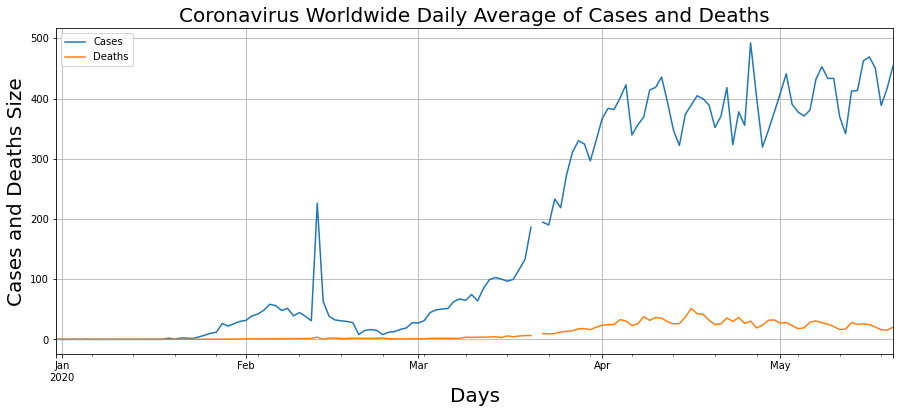

In [ ]:
df[['Cases','Deaths']].resample('D').mean().plot(figsize=(15,6), grid=True,) #Line plot Daily both cases and deaths due to Covid-19
plt.title('Coronavirus Worldwide Daily Average of Cases and Deaths', size=20);
plt.xlabel('Days', size=20)
plt.ylabel('Cases and Deaths Size', size=20);

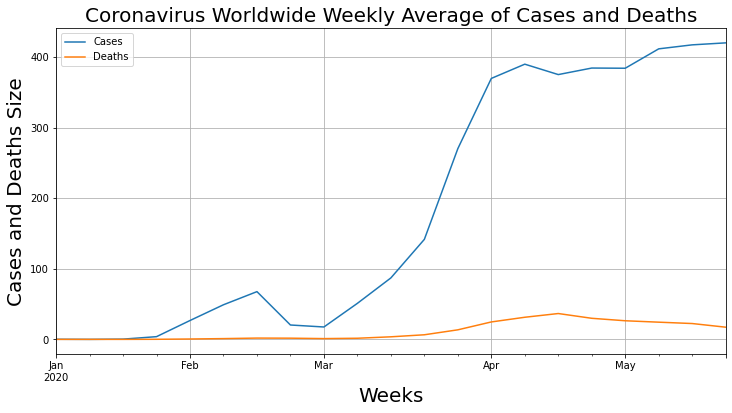

In [ ]:
df[['Cases','Deaths']].resample("W").mean().plot(figsize=(12, 6), grid=True,)#Line plot weekly both cases and deaths due to Covid-19
plt.title('Coronavirus Worldwide Weekly Average of Cases and Deaths', size=20);
plt.xlabel('Weeks', size=20)
plt.ylabel('Cases and Deaths Size', size=20);

Text(0, 0.5, 'Cases and Death Size')

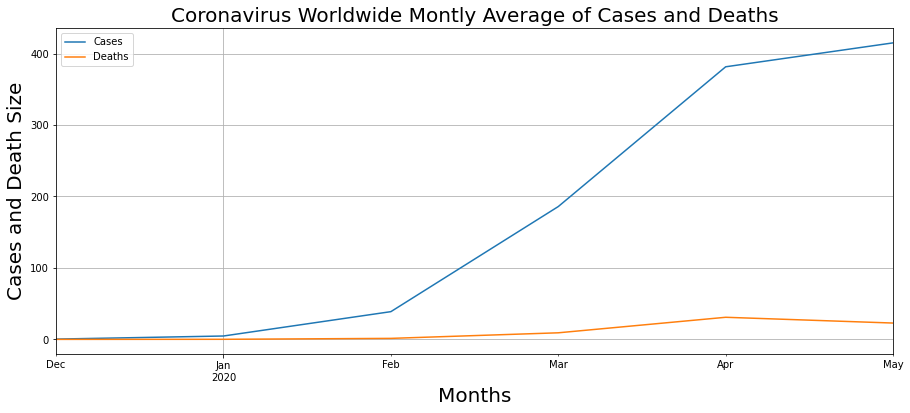

In [ ]:
df[['Cases','Deaths']].resample('M').mean().plot(figsize=(15,6), grid=True,) #Line plot Montly both cases and deaths due to Covid-19
plt.title('Coronavirus Worldwide Montly Average of Cases and Deaths', size=20);
plt.xlabel('Months', size=20)
plt.ylabel('Cases and Death Size', size=20)

# March Analysis


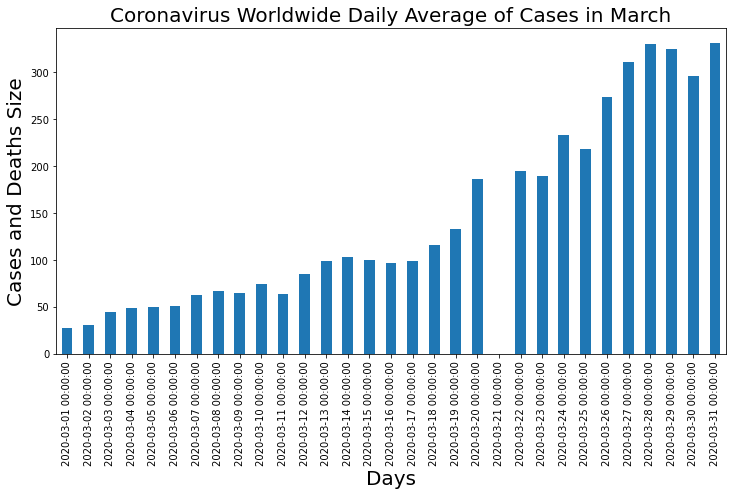

In [ ]:
df['2020-03'].Cases.resample('D').mean().plot(kind='bar',figsize=(12, 6)) #Daily basis just cases in bar plot in March 2020
plt.title('Coronavirus Worldwide Daily Average of Cases in March', size=20)
plt.xlabel('Days', size=20)
plt.ylabel('Cases and Deaths Size', size=20);

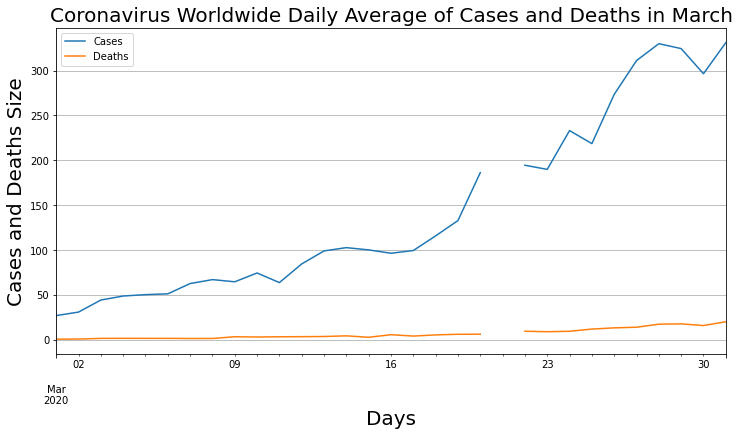

In [ ]:
df['2020-03'].resample('D').mean().plot(figsize=(12, 6), grid=True,)#Daily basis both cases and deaths in bar plot in March 2020
plt.title('Coronavirus Worldwide Daily Average of Cases and Deaths in March', size=20);
plt.xlabel('Days', size=20)
plt.ylabel('Cases and Deaths Size', size=20);

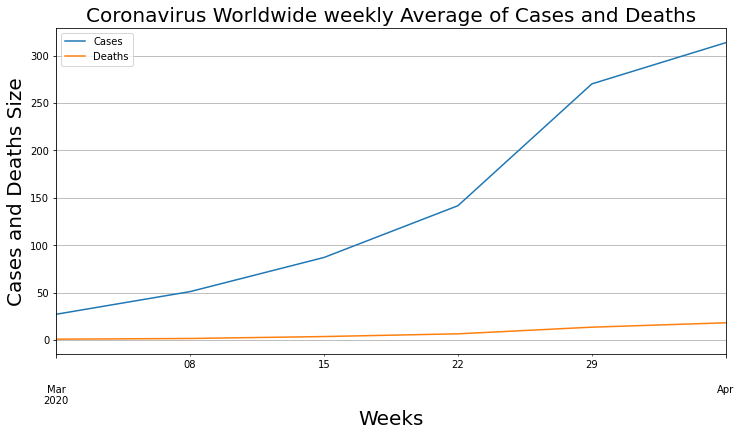

In [ ]:
df['2020-03'].resample('W').mean().plot(figsize=(12, 6), grid=True,) #Weekly basis both cases and deaths in line plot in March 2020
plt.title('Coronavirus Worldwide weekly Average of Cases and Deaths', size=20)
plt.xlabel('Weeks', size=20)
plt.ylabel('Cases and Deaths Size', size=20);

# April Analysis

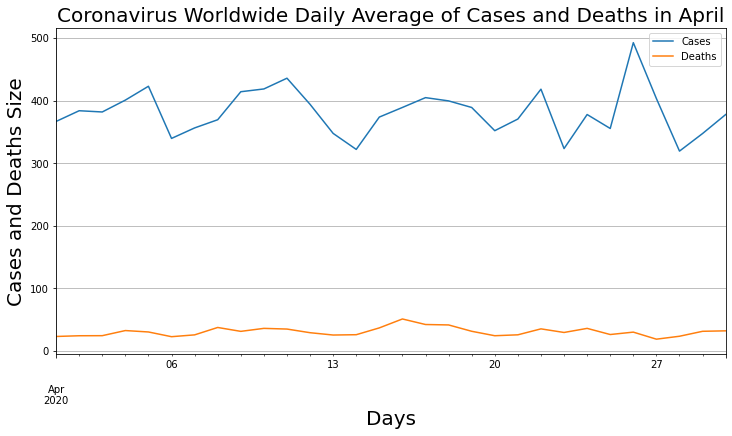

In [ ]:
df['2020-04'].resample('D').mean().plot(figsize=(12, 6), grid=True,) ##Daily basis cases and deaths in line plot in April 2020
plt.title('Coronavirus Worldwide Daily Average of Cases and Deaths in April', size=20)
plt.xlabel('Days', size=20)
plt.ylabel('Cases and Deaths Size', size=20);

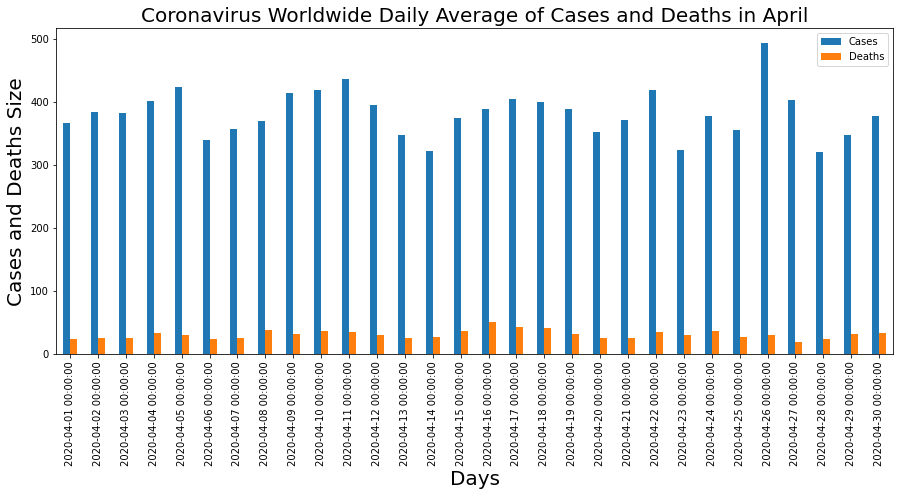

In [ ]:
df['2020-04'].resample('D').mean().plot(kind='bar',figsize=(15, 6)) #Daily basis cases and deaths in bar plot in April 2020
plt.title('Coronavirus Worldwide Daily Average of Cases and Deaths in April', size=20)
plt.xlabel('Days', size=20)
plt.ylabel('Cases and Deaths Size', size=20);

# May Analysis


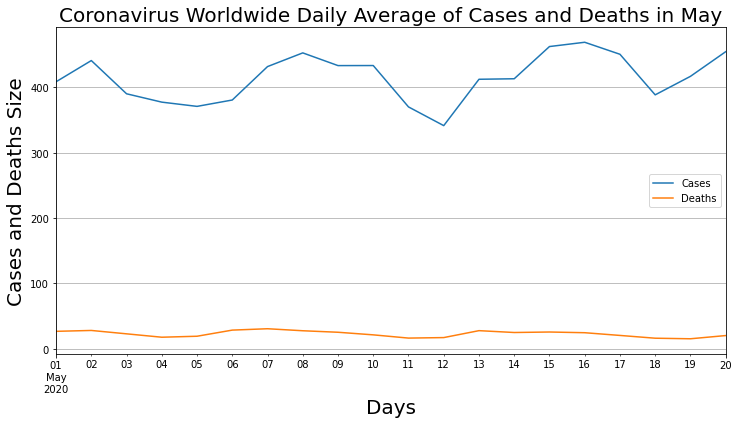

In [ ]:
df['2020-05'].resample('D').mean().plot(figsize=(12, 6), grid=True,) ##Daily basis cases and deaths in line plot in May 2020
plt.title('Coronavirus Worldwide Daily Average of Cases and Deaths in May', size=20)
plt.xlabel('Days', size=20)
plt.ylabel('Cases and Deaths Size', size=20);

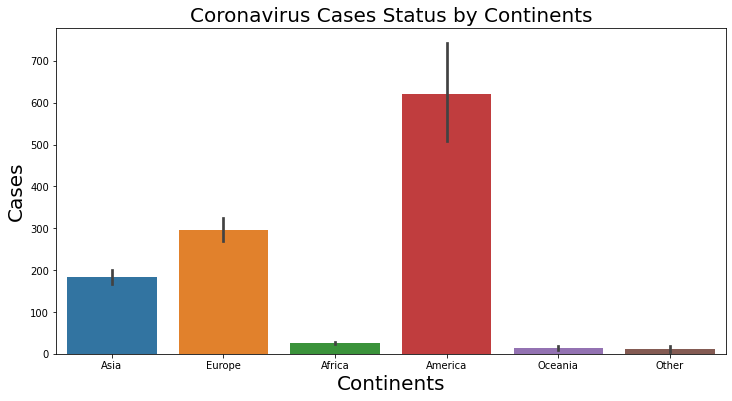

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Continent',y="Cases",data=df);
plt.title('Coronavirus Cases Status by Continents', size=20);
plt.xlabel('Continents', size=20)
plt.ylabel('Cases', size=20);

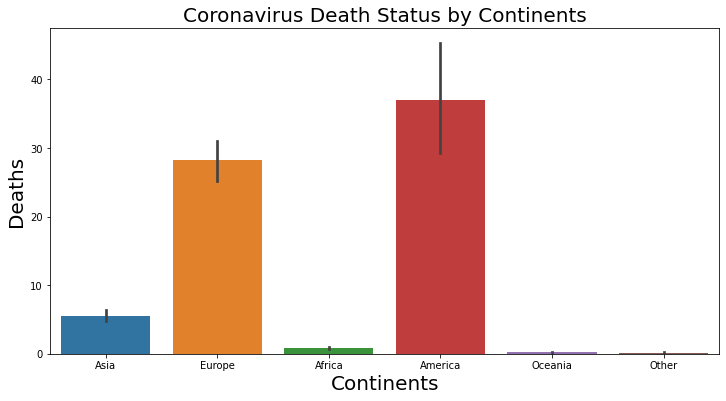

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Continent',y="Deaths",data=df);
plt.title('Coronavirus Death Status by Continents', size=20);
plt.xlabel('Continents', size=20)
plt.ylabel('Deaths', size=20);

In [ ]:
%%html
<iframe src= "https://who.maps.arcgis.com/apps/opsdashboard/index.html#/ead3c6475654481ca51c248d52ab9c61?:display_count=y&:origin=viz_share_link" width="1400" height="1000">
</iframe>